In [ ]:
#importing Library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
#getting data 

netflix=pd.read_csv('/content/drive/My Drive/netflix_titles_IMDB.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_Seasons,duration_in_min,listed_in,IMDB_RATING,IMDB_RATINGS_people_count,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,0,90,"Children & Family Movies, Comedies",3.1,235,Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,0,94,Stand-Up Comedy,5.3,15,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,0,Kids' TV,7.8,4891,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,0,Kids' TV,6.0,764,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,0,99,Comedies,5.2,4866,When nerdy high schooler Dani finally attracts...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Handling missing values**

In [ ]:
#getting missing values count
missing_values_count = netflix.isnull().sum()
missing_values_count

show_id                         0
type                            0
title                           0
director                     1969
cast                          570
country                       476
date_added                     11
release_year                    0
rating                         10
duration_in_Seasons             0
duration_in_min                 0
listed_in                       0
IMDB_RATING                     0
IMDB_RATINGS_people_count       0
description                     0
dtype: int64

In [ ]:
 #filling empty country field with US.
netflix['country'] = netflix['country'].fillna('United States')
netflix['country'].isnull().sum()

0

In [ ]:
#Empty rows of rating fill with TV-MA (Tv-MA is most common type of rating)
netflix['rating'] = netflix['rating'].fillna('TV-MA')
netflix['rating'].isnull().sum()

0

In [ ]:
#fill empty rows in date_added with 1st January 2020 
#(this means if movies do not have added year on netflix than we are suggesting it got added on 1st January 2020.)
netflix['date_added'] =netflix['date_added'].fillna('January 1, 2020')
netflix['date_added'].isnull().sum()

0

In [ ]:
netflix['month_added'] = pd.to_datetime(netflix['date_added']).dt.month_name() #Getting month name
netflix['year_added'] = pd.to_datetime(netflix['date_added']).dt.year #Getting year

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_Seasons,duration_in_min,listed_in,IMDB_RATING,IMDB_RATINGS_people_count,description,month_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,0,90,"Children & Family Movies, Comedies",3.1,235,Before planning an awesome wedding for his gra...,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,0,94,Stand-Up Comedy,5.3,15,Jandino Asporaat riffs on the challenges of ra...,September,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,0,Kids' TV,7.8,4891,"With the help of three human allies, the Autob...",September,2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,0,Kids' TV,6.0,764,When a prison ship crash unleashes hundreds of...,September,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,0,99,Comedies,5.2,4866,When nerdy high schooler Dani finally attracts...,September,2017


In [ ]:
netflix.isnull().sum() #checking for null values 


show_id                         0
type                            0
title                           0
director                     1969
cast                          570
country                         0
date_added                      0
release_year                    0
rating                          0
duration_in_Seasons             0
duration_in_min                 0
listed_in                       0
IMDB_RATING                     0
IMDB_RATINGS_people_count       0
description                     0
month_added                     0
year_added                      0
dtype: int64

In [ ]:
#removing unwanted columns
netflix_clean = netflix.drop(['show_id','date_added','description'],axis=1) 
netflix_clean.head() 


,type,title,director,cast,country,release_year,rating,duration_in_Seasons,duration_in_min,listed_in,IMDB_RATING,IMDB_RATINGS_people_count,month_added,year_added
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,0,90,"Children & Family Movies, Comedies",3.1,235,September,2019
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,0,94,Stand-Up Comedy,5.3,15,September,2016
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1,0,Kids' TV,7.8,4891,September,2018
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1,0,Kids' TV,6.0,764,September,2018
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,0,99,Comedies,5.2,4866,September,2017


# **EDA**

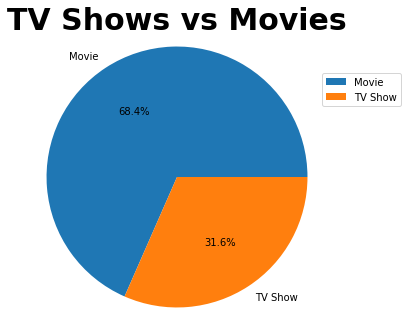

In [ ]:
#getting counts of tv shows and movies
movie_tvshows_count = netflix_clean.type.value_counts() 
plt.pie(movie_tvshows_count.values,labels=movie_tvshows_count.index,autopct='%1.1f%%',radius=1.5)
plt.legend(movie_tvshows_count.index,loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('TV Shows vs Movies',y=1.15,fontsize=30.0, fontweight='bold')

plt.show()





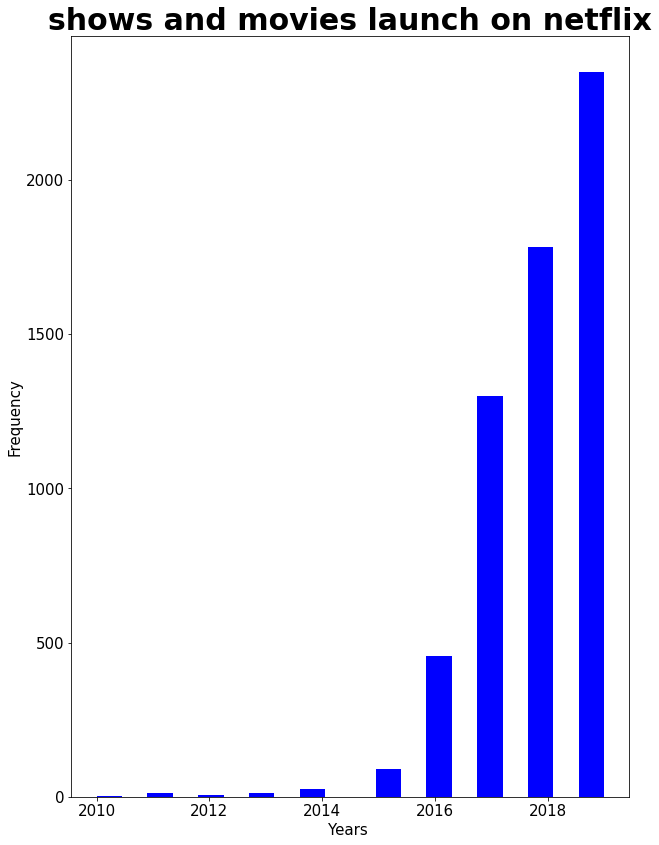

In [ ]:
#In which year how, many contents added on Netflix
plt.figure(figsize=(10,14))
bins=20
plt.hist(netflix_clean.year_added, bins, color ='blue', range=(2010,2019)) 
#y=plt.hist(netflix_clean.year_added #taking range to show past 10 years data
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Years ',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('shows and movies launch on netflix',fontsize=30.0, fontweight='bold')
plt.show()#


Text(232.5, 0.5, 'Month Name')

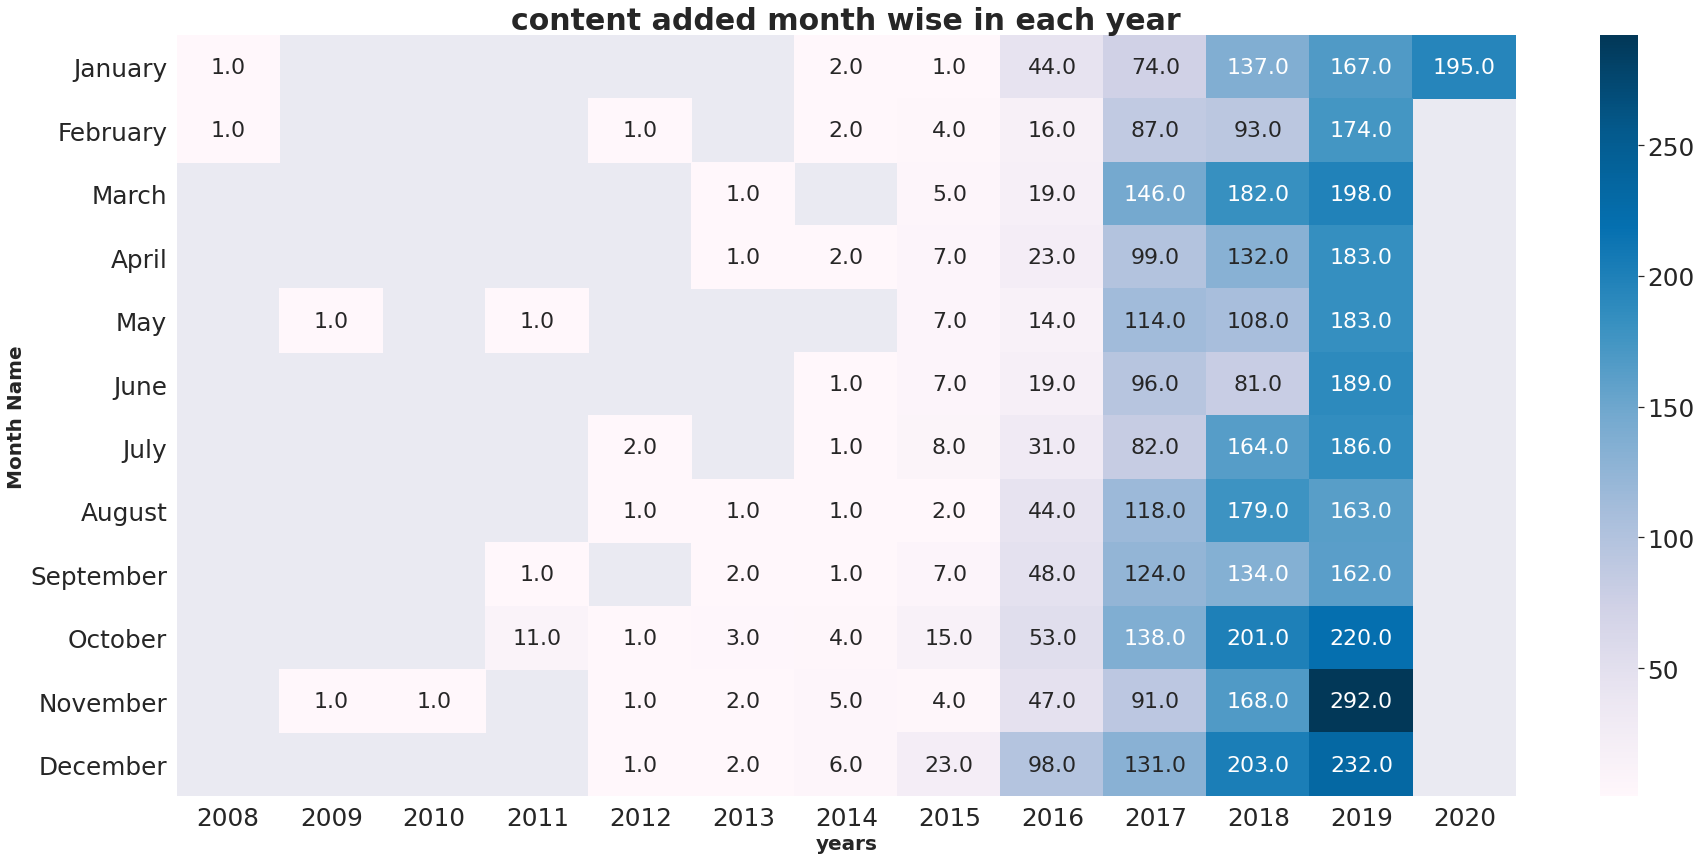

In [ ]:
#Heatmap to show month and year relationship in a context of content added on Netflix
movies_heatmap_df = netflix_clean.groupby(['year_added', 'month_added']).size().reset_index(name='count')

month_ordered = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December']

movies_heatmap_df['month_added'] = movies_heatmap_df['month_added'].astype(pd.api.types.CategoricalDtype(month_ordered))

plt.figure(figsize=(30,14))

sns.set(font_scale=2.25)

ax = pd.pivot_table(movies_heatmap_df, values= 'count', index=['month_added'], columns='year_added')
sns.heatmap(ax, cmap="PuBu", annot = True, fmt = ".1f", annot_kws={'size':22})

plt.title('content added month wise in each year',fontsize=30.0, fontweight='bold')

plt.xlabel('years',fontsize=20.0, fontweight='bold')
plt.ylabel('Month Name',fontsize=20.0, fontweight='bold')

In [ ]:
##animation graph showing netflix content added each year in all countries

year_country2 = netflix_clean.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,100],
                    color_continuous_scale=px.colors.sequential.Cividis_r
                   )

fig.update_layout(title='Comparison by country')
fig.show()

Text(0, 0.5, 'Country')

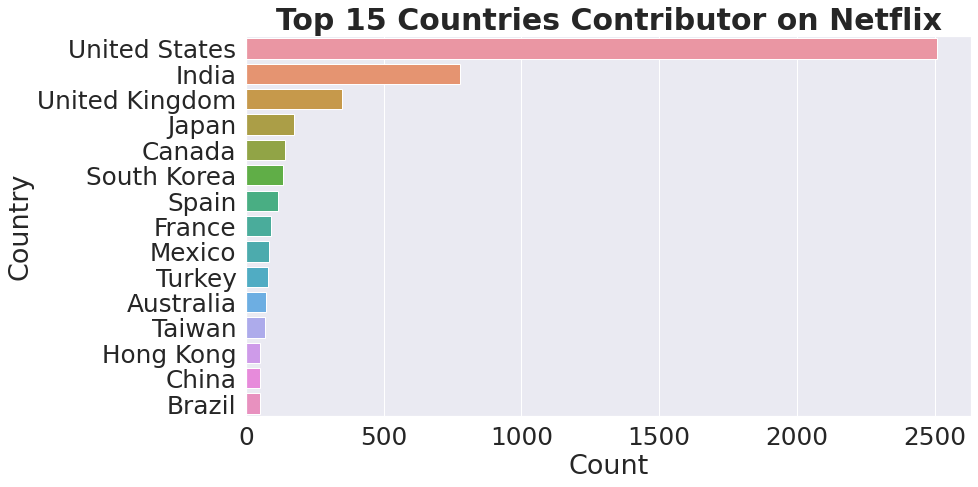

In [ ]:
#netflix shows and movies of top 15 countries

filtered_countries = netflix_clean.country
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15]) 
plt.title('Top 15 Countries Contributor on Netflix',fontsize=30.0, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Country')
#plt.subplot(1,2,1)






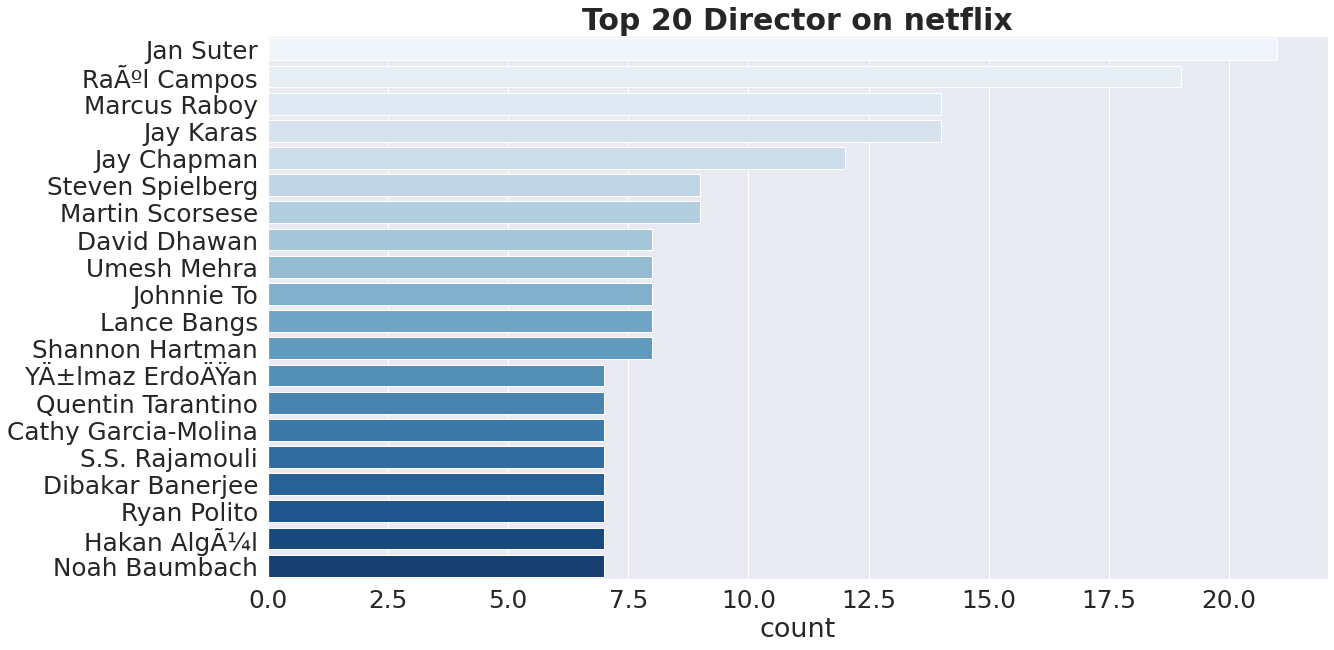

In [ ]:
#finding top 20 directors on netflix
 #spliting directors name from each row directors name from each row
filtered_directors = netflix_clean.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(19,10))
plt.title('Top 20 Director on netflix',fontsize=30.0, fontweight='bold')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:20], palette='Blues')
plt.show()


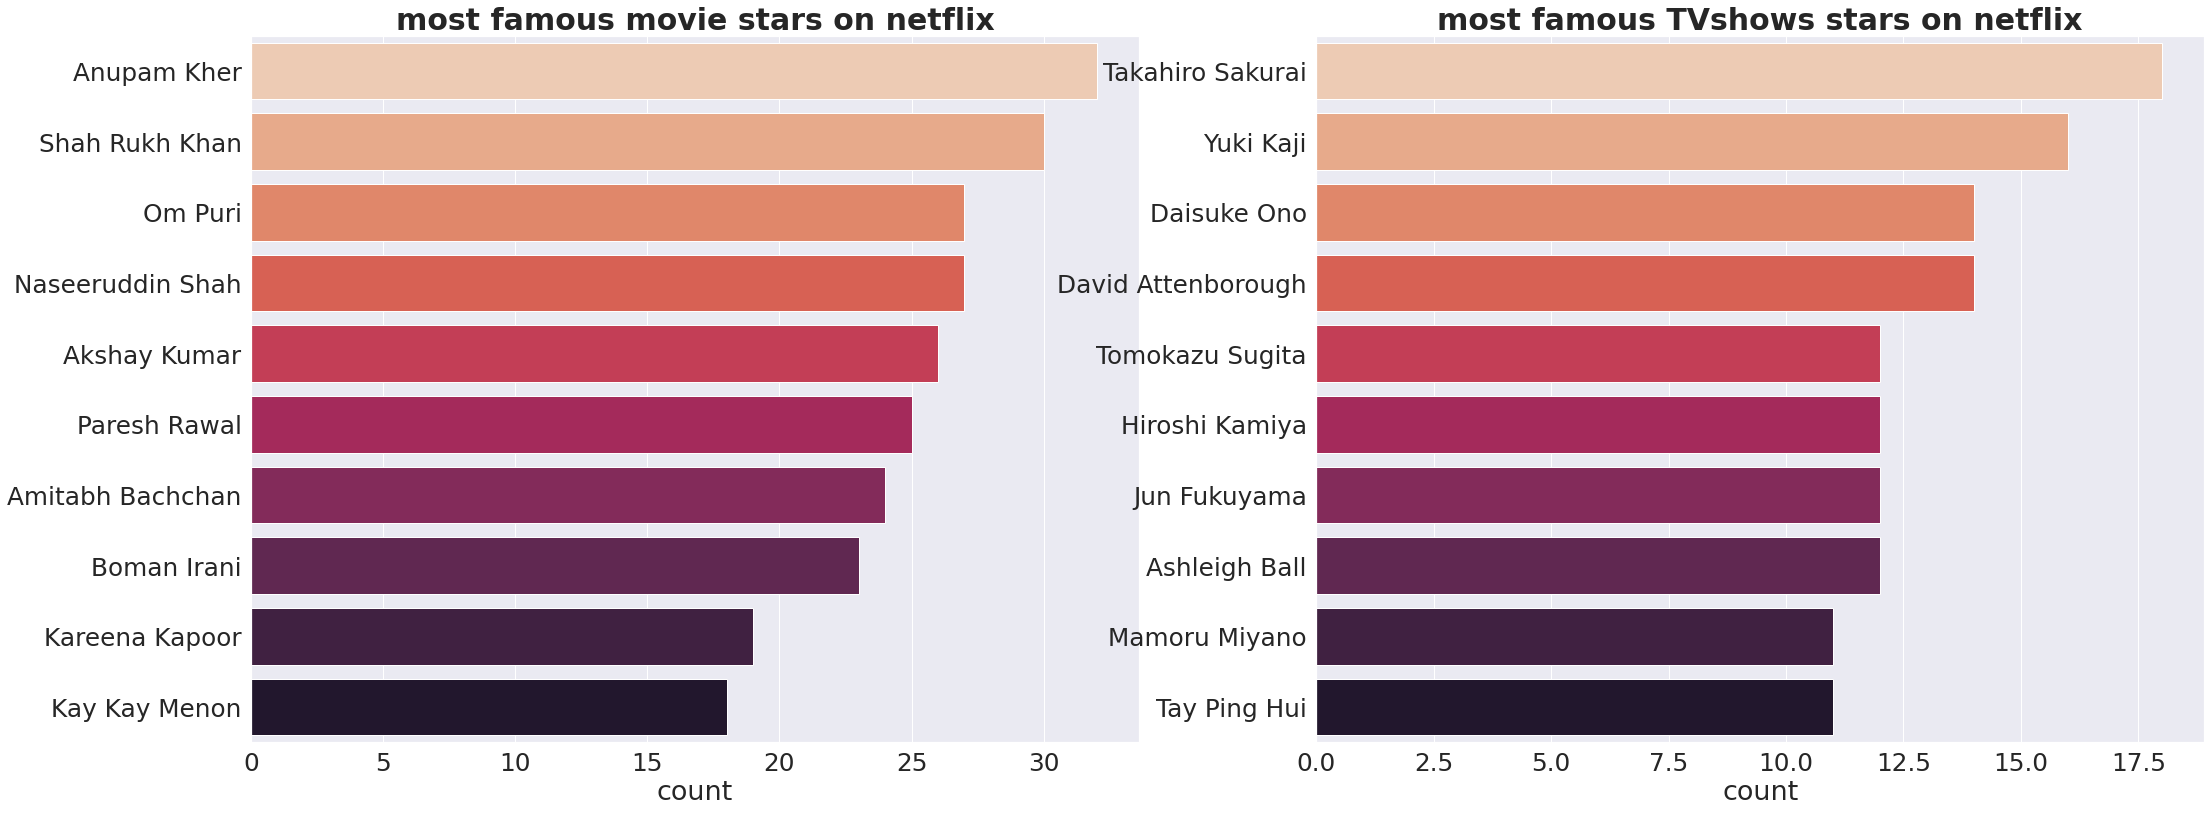

In [ ]:

#filtering movies from Netflix dataset
netflix_movie_type = netflix_clean[netflix_clean.type == 'Movie']

#filtering TVShows from Netflix dataset

netflix_tvshows_type = netflix_clean[netflix_clean.type == 'TV Show']

##top stars on netflix(movies)
 #spliting Stars name from each row for movie
filtered_cast_movie = netflix_movie_type.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(35,13))
plt.subplot(1,2,1)
plt.title('most famous movie stars on netflix',fontsize=30.0, fontweight='bold')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10],palette='rocket_r')


##top stars on netflix(TVshows)
 #spliting Stars name from each row for TVshows
filtered_cast_shows = netflix_tvshows_type.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.subplot(1,2,2)
plt.title('most famous TVshows stars on netflix',fontsize=30.0, fontweight='bold')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10],palette='rocket_r')



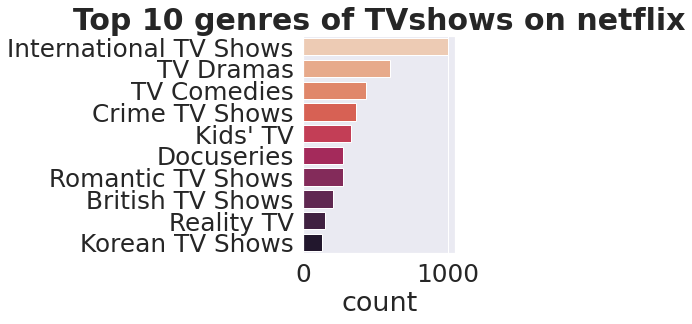

In [ ]:



##top stars on netflix(TVshows)
 #spliting Stars name from each row for TVshows
filtered_genre_shows = netflix_tvshows_type.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.subplot(1,2,2)
plt.title('Top 10 genres of TVshows on netflix',fontsize=30.0, fontweight='bold')
sns.countplot(y = filtered_genre_shows, order=filtered_genre_shows.value_counts().index[:10],palette='rocket_r')


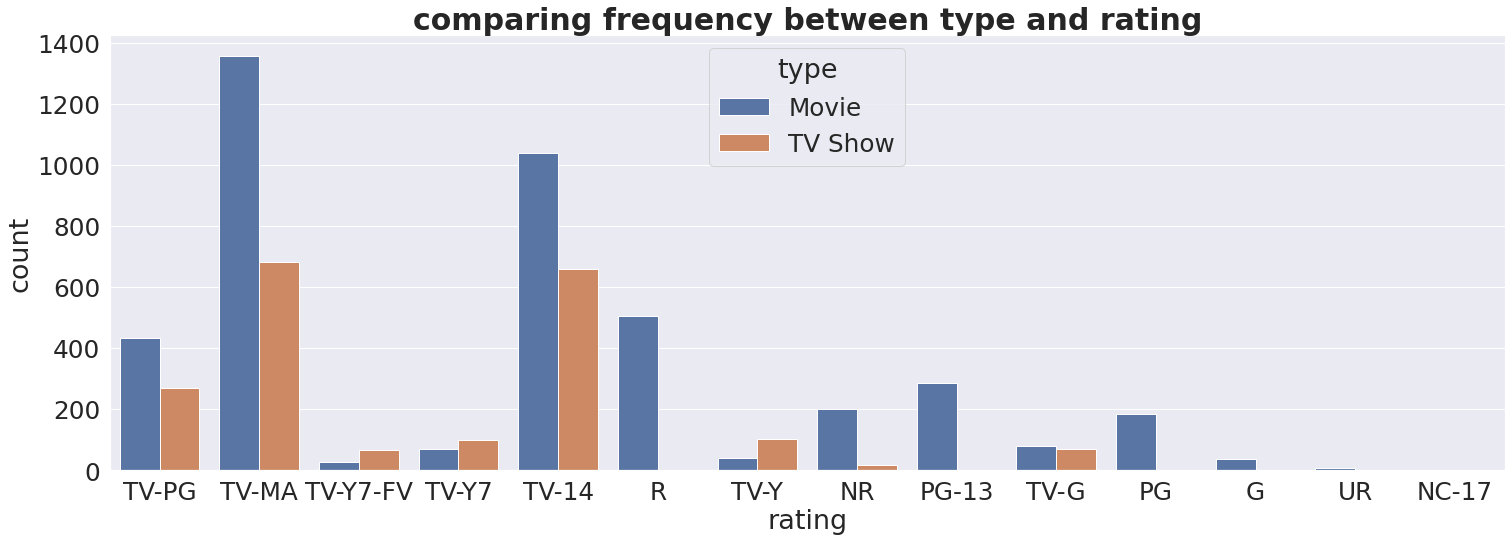

In [ ]:
#comparision of movies and tvshows count according to rating
plt.figure(figsize=(25,8))
sns.countplot(x='rating',hue='type',data=netflix_clean)
plt.title('comparing frequency between type and rating',fontsize=30.0, fontweight='bold')
plt.show()

In [ ]:
#country wise top 10 actors

##splitting countries name from each row
netflix['country'] = netflix.country.str.replace(", | ,", ",")
movies_country_df = pd.DataFrame(netflix.country.str.split(',').tolist(), index=netflix.show_id).stack()
movies_country_df = movies_country_df.reset_index([0, 'show_id'])
movies_country_df.columns = ['show_id', 'country']



##splitting cast's name from each row
cast_df = netflix[['show_id', 'cast']]
cast_df = cast_df.dropna()
cast_df['cast'] = cast_df.cast.str.replace(", | ,", ",")
cast_df = pd.DataFrame(cast_df.cast.str.split(',').tolist(), index=cast_df.show_id).stack()
cast_df = cast_df.reset_index([0, 'show_id'])
cast_df.columns = ['show_id', 'cast']


## merging countries name and cast in one data frame
cast_df = pd.merge(movies_country_df, cast_df, on='show_id', how = 'inner')
cast_df = cast_df.groupby(['cast','country']).size().reset_index(name='count')
country_list = ['United States', 'India', 'United Kingdom', 'France', 'Canada', 'Spain']
cast_df = cast_df[cast_df['country'].isin(country_list)]
cast_df = cast_df.groupby(['country']).apply(lambda x: x.sort_values(['count'],ascending = False)).reset_index(drop = True)
cast_df = cast_df.groupby(['country']).head(10)

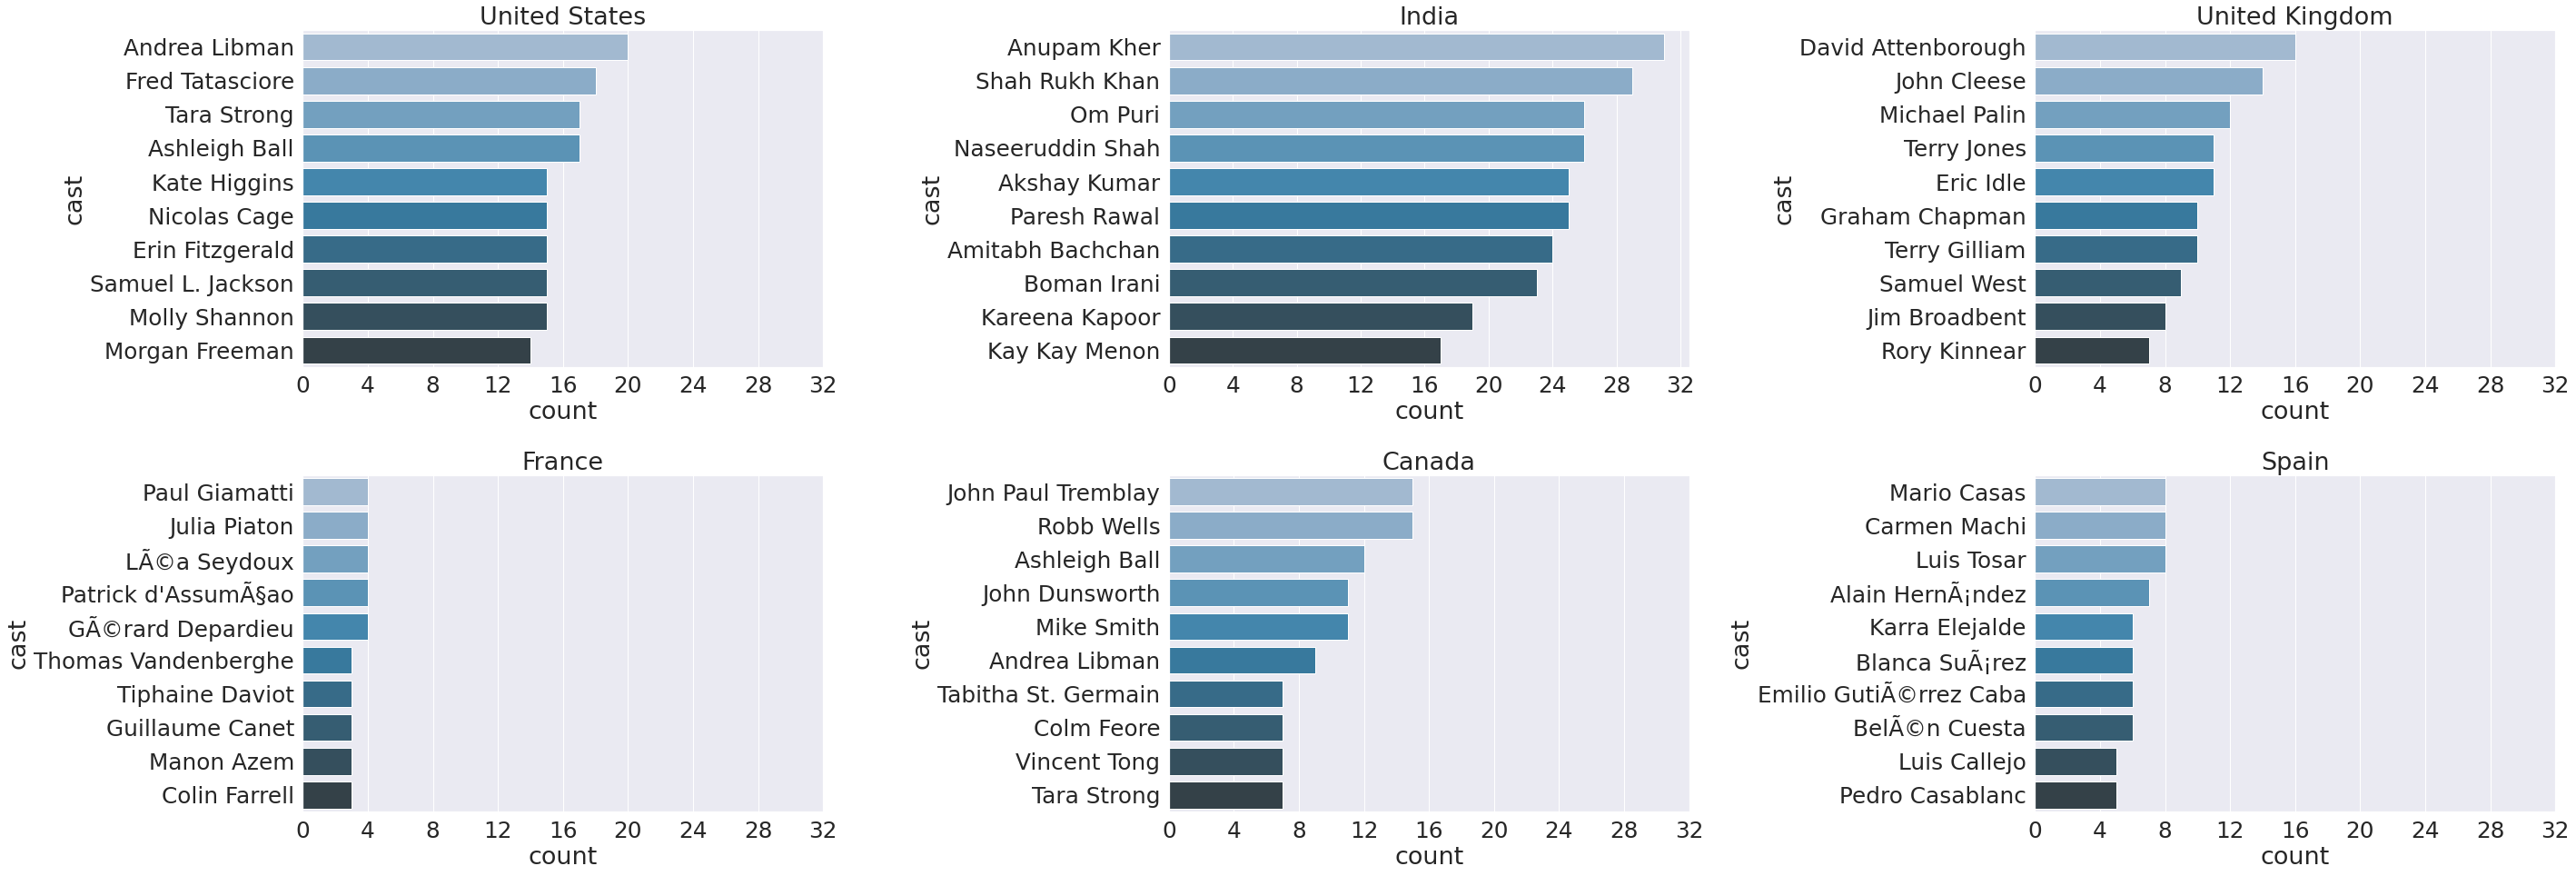

In [ ]:


f, ax = plt.subplots(2, 3, figsize=(40, 14), sharex=False)

ax1 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'United States'], palette="PuBu_d", ax=ax[0, 0]).set_title("United States")
ax2 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'India'], palette="PuBu_d", ax=ax[0, 1]).set_title("India")
ax3 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'United Kingdom'], palette="PuBu_d", ax=ax[0, 2]).set_title("United Kingdom")
ax4 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'France'], palette="PuBu_d", ax=ax[1, 0]).set_title("France")
ax5 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'Canada'], palette="PuBu_d", ax=ax[1,1]).set_title("Canada")
ax6 = sns.barplot(x = 'count', y = 'cast', data = cast_df[cast_df['country'] == 'Spain'], palette="PuBu_d", ax=ax[1, 2]).set_title("Spain")

plt.setp(ax, xticks=np.arange(0,36,4))
plt.tight_layout()



In [ ]:
# count of each rating type 
rating_count = netflix_clean.rating.value_counts() 
rating_count

TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [ ]:
#season distribution according to netflix_Ratings
##creating list of top 5 rating type 
per_season_tv_ma=[]
per_season_tv_14=[]
per_season_tv_pg=[]
per_season_R=[]
per_season_pg_13=[]



for i in range(1,15):
    a = netflix_clean.loc[(netflix_clean['rating']=='TV-MA') & (netflix_clean.duration_in_Seasons==i)] 
    b = netflix_clean.loc[(netflix_clean['rating']=='TV-14') & (netflix_clean.duration_in_Seasons==i)] 
    c = netflix_clean.loc[(netflix_clean['rating']=='TV-PG') & (netflix_clean.duration_in_Seasons==i)] 
    d = netflix_clean.loc[(netflix_clean['rating']=='R') & (netflix_clean.duration_in_Seasons==i)] 
    e = netflix_clean.loc[(netflix_clean['rating']=='PG-13') & (netflix_clean.duration_in_Seasons==i)] 

    per_season_tv_ma.append(len(a))
    per_season_tv_14.append(len(b))
    per_season_tv_pg.append(len(c))
    per_season_R.append(len(d))
    per_season_pg_13.append(len(e))

trace1 = go.Scatter(x=[i for i in range(1,15)],y=per_season_tv_ma,mode='lines+markers',name=' Mature Audiences Only')
trace2 = go.Scatter(x=[i for i in range(1,15)],y=per_season_tv_14,mode='lines+markers',name='children under 14 years')
trace3 = go.Scatter(x=[i for i in range(1,15)],y=per_season_tv_pg,mode='lines+markers',name='TV parental guidelines')
trace4 = go.Scatter(x=[i for i in range(1,15)],y=per_season_R,mode='lines+markers',name='18+')
trace5 = go.Scatter(x=[i for i in range(1,15)],y=per_season_pg_13,mode='lines+markers',name='8 to 13 age group')

data=[trace1,trace2,trace3,trace4,trace5]

layout = go.Layout(title="Top 5 rating category per seasons", legend=dict(x=0.1, y=1.1, orientation="h"),xaxis_title="number of season",
    yaxis_title="count")



fig = go.Figure(data, layout=layout)

fig.show()


# **Text analysis**

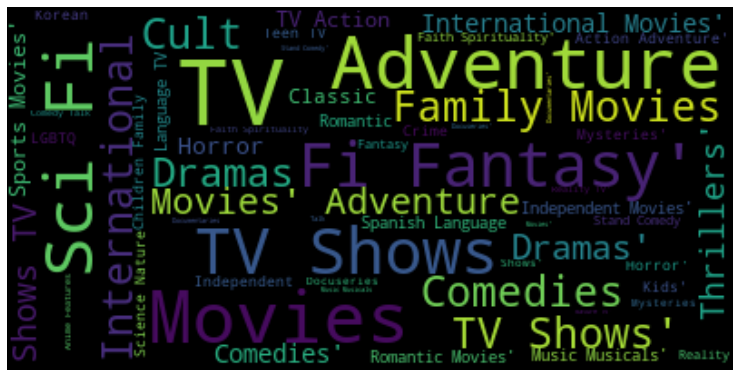

In [ ]:
#Genre Text Analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#splitting genre 
filtered_genre = netflix_clean.listed_in.str.split(r"\,|&", n=1, expand=True).stack().reset_index(level=1, drop=True)
text = list(set(filtered_genre))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
